In [1]:
import cmasher as cmr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
import numpy as np
import pyccl as ccl
print(ccl.__version__)

3.0.2


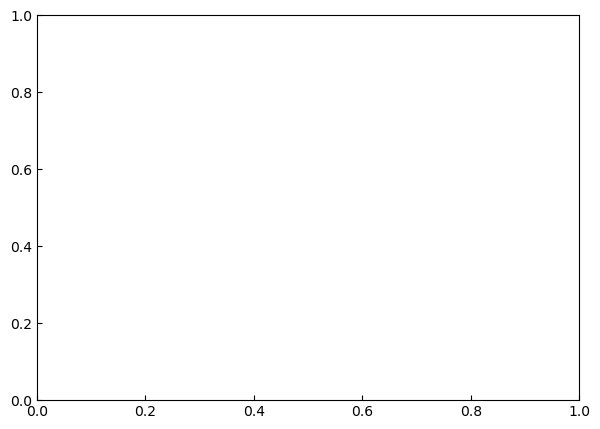

In [2]:
# Set default rcParams using plt.rc
plt.rc('figure', figsize=[7, 5])  # Default figure size
plt.rc('lines', linewidth=3, markersize=10)  # Default line width and marker size
plt.rc('image', cmap='cmr.pride')  # Default color map
plt.gca().tick_params(direction='in', which='both')  # Tick parameters for both xtick and ytick
# Set tick labels font size
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=18)  # Font sizes for x and y labels
plt.rc('legend', frameon=False, fontsize=15)  # Legend properties
# Fig title properties
plt.rc('axes', titlesize=20)  # Font size for figure title

# Default colors
def get_colors(data_len, cmap='cmr.pride'):
    """
    Get colors from a colormap.
    Parameters
    ----------
    data_len: int
        Number of colors to generate.
    cmap: str
        Name of the colormap to use.

    Returns
    -------
    colors: list
        List of colors in hex format.

    """
    return cmr.take_cmap_colors(cmap, data_len, cmap_range=(0.1, 0.9), return_fmt='hex')

plots_path = "plots_output/"

# Baryons plot

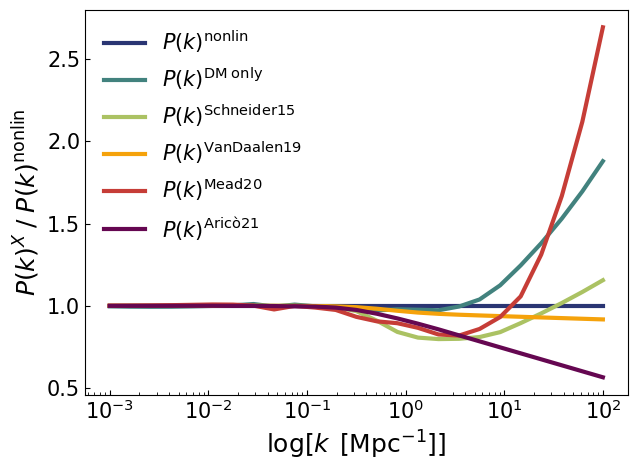

In [13]:
# Load data
baryons_data = np.load("data/baryons_pk_data.npy", allow_pickle=True).item()
baryons_labels = np.load("data/baryons_pk_labels.npy", allow_pickle=True).item()
baryons_halomodel_data = np.load("data/baryons_halo_model_pk.npy", allow_pickle=True).item()
#baryons_halomodel_labels = np.load("data/baryons_halomodel_pk_labels.npy", allow_pickle=True).item()

# Create appropriate colors for the plots
baryons_colors = get_colors(len(baryons_data) - 1)  # need to subtract 2 for k and pk_nonlin

# Set the figure size
plt.figure()

# Iterate over the keys in baryons_data, excluding 'k' and 'pk_nonlin'
#for key, color in zip([k for k in baryons_data if k not in ["k", "pk_nonlin"]], baryons_colors):

for key, color in zip([k for k in baryons_data if k not in ["k"]], baryons_colors):
    plt.semilogx(baryons_data["k"],
                 baryons_data[key] / baryons_data["pk_nonlin"],
                 c=color, 
                 label=baryons_labels[key])
    
plt.gca().tick_params(direction='in', which='both') 

plt.xlabel("log$[k \: \: \mathrm{[Mpc^{-1}]}]$")
#plt.ylabel("$\\frac{P(k)^X}{P(k)^{\mathrm{nonlin}}}$")

plt.ylabel("${P(k)^X} \; / \; {P(k)^{\mathrm{nonlin}}}$")
plt.legend()

plt.savefig(f"{plots_path}baryons.pdf", bbox_inches='tight', dpi=300, transparent=False)


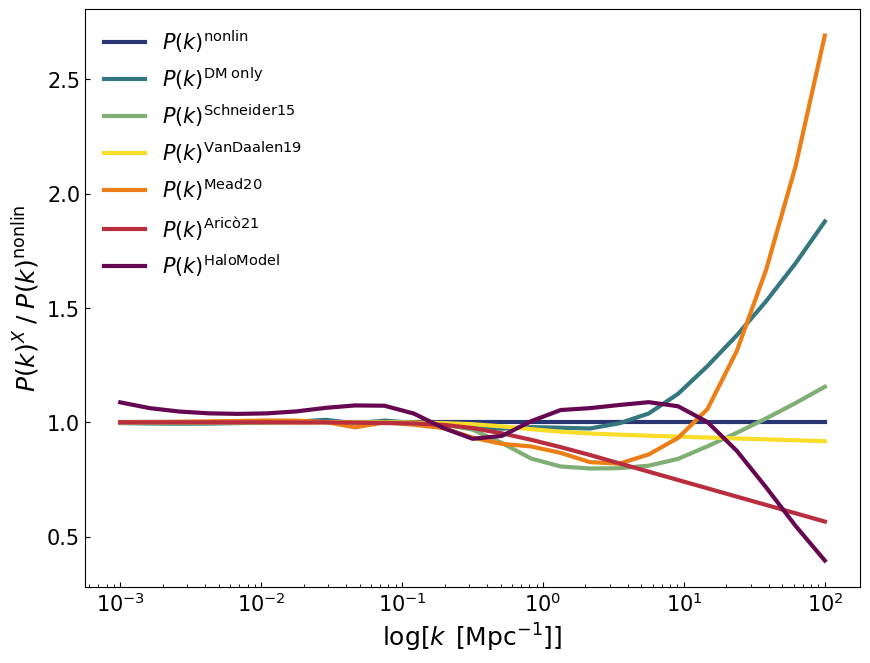

In [12]:
# Create appropriate colors for the plots
baryons_colors = get_colors(len(baryons_data))  

# Set the figure size if needed
plt.figure(figsize=(10, 7.5))  

# Plotting baryon models
for key, color in zip([k for k in baryons_data if k not in ["k"]], baryons_colors[:-1]):  # Exclude the last color for halo model
    plt.semilogx(baryons_data["k"], baryons_data[key] / baryons_data["pk_nonlin"], c=color, label=baryons_labels[key])

# Plotting halo model pk_halo_total over pk_nonlin
plt.semilogx(baryons_data["k"], baryons_halomodel_data["total"] / baryons_data["pk_nonlin"], c=baryons_colors[-1], label="$P(k)^\mathrm{HaloModel}$")


plt.gca().tick_params(direction='in', which='both') 
plt.xlabel("log$[k \: \: \mathrm{[Mpc^{-1}]}]$")
plt.ylabel("${P(k)^X} \; / \; {P(k)^{\mathrm{nonlin}}}$")
plt.legend(loc=2)

plt.savefig(f"{plots_path}baryons_w_halomodel.pdf", bbox_inches='tight', dpi=300, transparent=False)


# Halo Model for IA

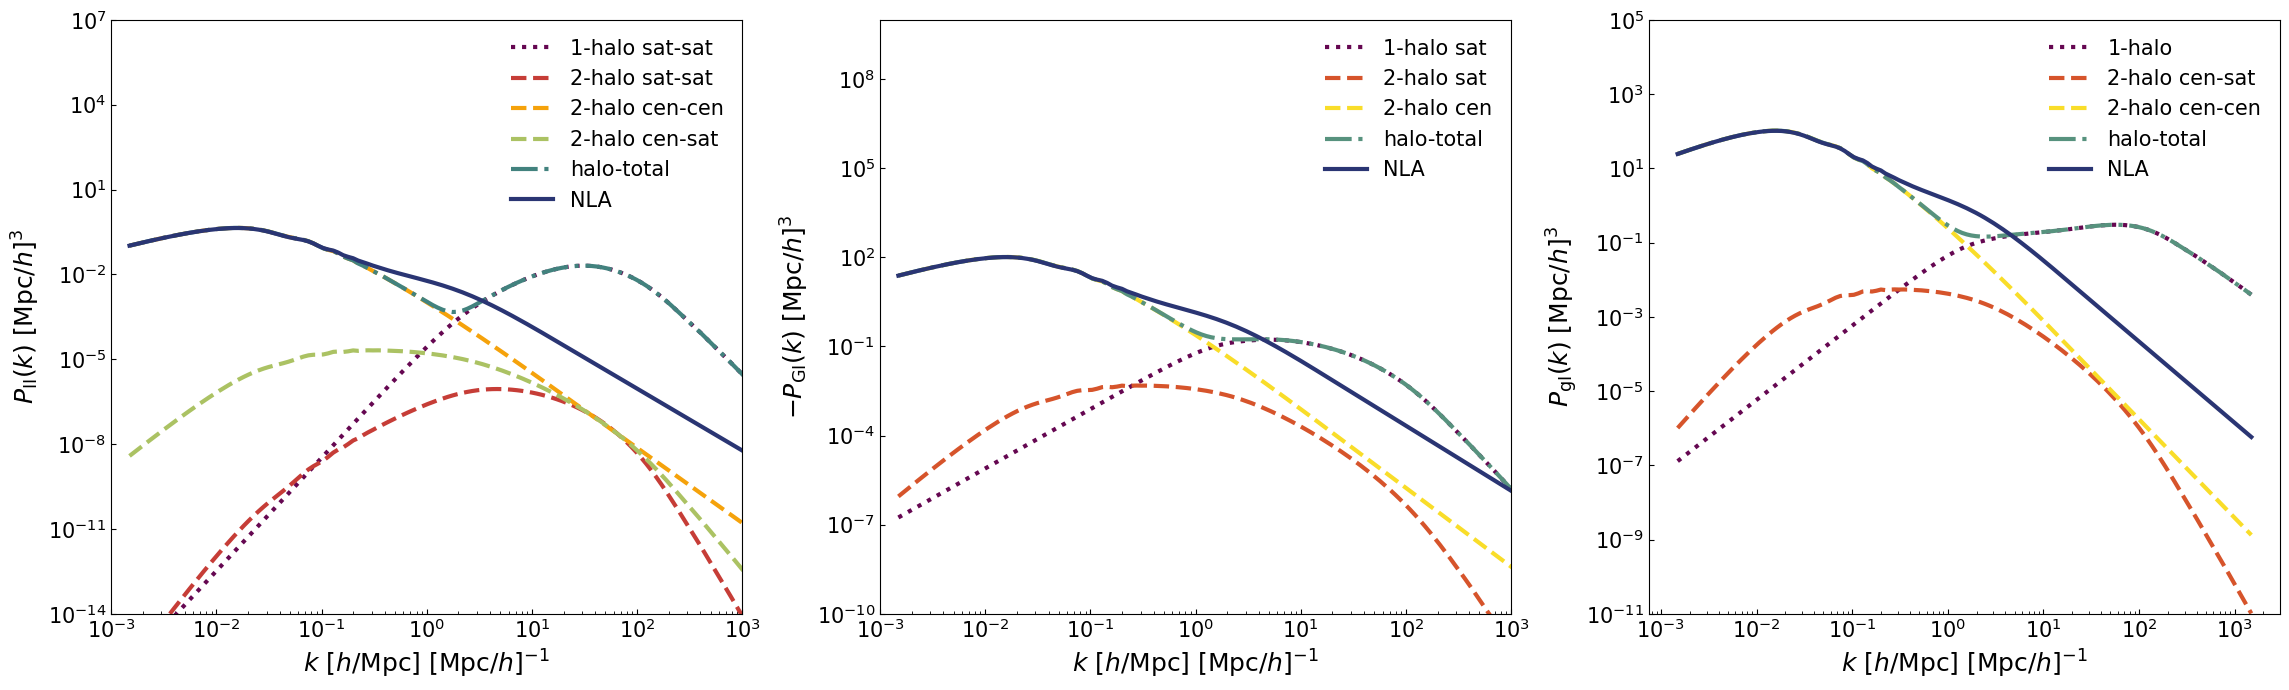

In [14]:
# Load the data
halo_ia_data = np.load('data/halo_model_ia_data.npy', allow_pickle=True).item()

# Adjust to create 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(23, 7)) 

# Generate colors for each subplot
colors_II = get_colors(len(halo_ia_data['II']), cmap="cmr.pride_r")
colors_GI = get_colors(len(halo_ia_data['GI']), cmap="cmr.pride_r")
colors_gI = get_colors(len(halo_ia_data['gI']), cmap="cmr.pride_r")

# Function to determine line style based on the name
def get_line_style(name):
    if "1-halo" in name or "1h" in name:
        return ":"
    elif "2-halo" in name or "2h" in name:
        return "--"
    elif "halo-total" in name:
        return "-."
    elif "NLA" in name:
        return "-"
    else:
        return "-"  # default style

# Plotting for 'II' data
for (name, data), color in zip(halo_ia_data['II'].items(), colors_II):
    line_style = get_line_style(name)
    ax[0].loglog(data['x'], data['y'], label=name, c=color, ls=line_style)

# Set labels, limits, legend for the first subplot
ax[0].set_ylabel(r'$P_{\mathrm{II}}(k)$ [Mpc$/h$]$^3$')
ax[0].set_xlabel(r'$k\,\,[h/{\rm Mpc}]$ [Mpc$/h$]$^{-1}$')
ax[0].legend()
ax[0].set_xlim([1e-3, 1e3])
ax[0].set_ylim([1e-14, 1e7])

# Plotting for 'GI' data
for (name, data), color in zip(halo_ia_data['GI'].items(), colors_GI):
    line_style = get_line_style(name)
    ax[1].loglog(data['x'], data['y'], label=name, c=color, ls=line_style)

# Set labels, limits, legend for the second subplot
ax[1].set_ylabel(r'$-P_{\mathrm{GI}}(k)$ [Mpc$/h$]$^3$')
ax[1].set_xlabel(r'$k\,\,[h/{\rm Mpc}]$ [Mpc$/h$]$^{-1}$')
ax[1].legend()
ax[1].set_xlim([1e-3, 1e3])
ax[1].set_ylim([1e-10, 1e10])

# Plotting for 'gI' data
for (name, data), color in zip(halo_ia_data['gI'].items(), colors_gI):
    line_style = get_line_style(name)
    ax[2].loglog(data['x'], data['y'], label=name, c=color, ls=line_style)

# Set labels, limits, legend for the third subplot
ax[2].set_ylabel(r'$P_{\mathrm{gI}}(k)$ [Mpc$/h$]$^3$')
ax[2].set_xlabel(r'$k\,\,[h/{\rm Mpc}]$ [Mpc$/h$]$^{-1}$')
ax[2].legend()
#ax[2].set_xlim([1e-3, 1e3])
ax[2].set_ylim([1e-11, 1e5])

# Adjust tick parameters
for a in ax:
    a.tick_params(direction='in', which='both') 

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig(f"{plots_path}halo_model_ia.pdf", bbox_inches='tight', dpi=300, transparent=False)


# Perturbation Theory Power Spectra

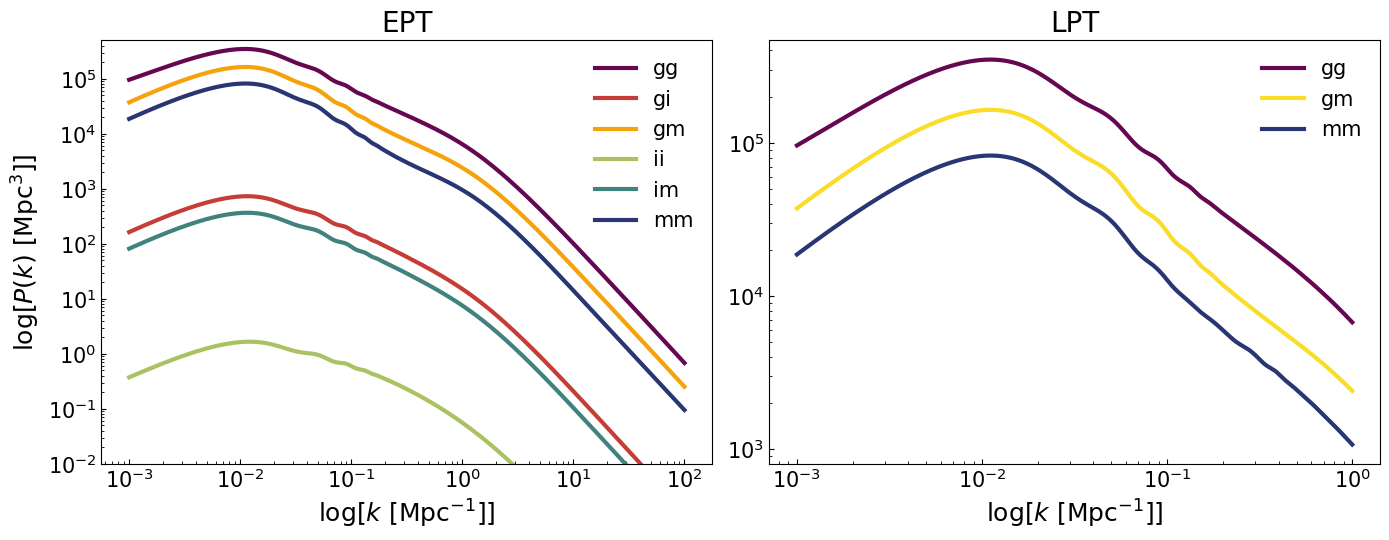

In [16]:
# Load the data
pert_pk_data = np.load('data/pert_pk_data.npy', allow_pickle=True).item()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5.5))

euler_colors = get_colors(len(pert_pk_data['euler']) - 1)  # need to subtract 1 for k
lagrange_colors = get_colors(len(pert_pk_data['lagrange']) - 1)  # need to subtract 1 for k

# Process and plot data for "euler"
euler_data = pert_pk_data['euler']
for key in euler_data:
    if key != 'k':  # Exclude 'k' as it's used for the x-axis
        ax[0].loglog(euler_data['k'], euler_data[key], label=key, c=euler_colors.pop())

# Process and plot data for "lagrange"
lagrange_data = pert_pk_data['lagrange']
for key in lagrange_data:
    if key != 'k':  # Exclude 'k' as it's used for the x-axis
        ax[1].loglog(lagrange_data['k'], lagrange_data[key], label=key, c=lagrange_colors.pop())
        

# Set labels for the plots
ax[0].set_xlabel(r'log$[k\,\,[{\rm Mpc}^{-1}]]$')
ax[0].set_ylabel(r'log$[P(k)\,\,[{\rm Mpc}^{3}]]$')
ax[0].set_title('EPT')
ax[0].set_ylim([1E-2, 5E5])
ax[0].legend()

ax[1].set_xlabel(r'log$[k\,\,[{\rm Mpc}^{-1}]]$')
#ax[1].set_ylabel(r'$P(k)\,\,[{\rm Mpc}^{3}]$')
ax[1].set_title('LPT')
ax[1].legend()

# Adjust tick parameters
for a in ax:
    a.tick_params(direction='in', which='both') 

# Adjust layout and save the plot
plt.tight_layout()

plt.savefig(f"{plots_path}pert_pk.pdf", bbox_inches='tight', dpi=300, transparent=False)


# Add your title and plots below, use markdown